# Import Modules

In [1]:
import pandas as pd
import numpy as np

import utils

# Load Data

In [2]:
target_vegetable = "トマト"
train_size = 4000

In [3]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_loader, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [4]:
future = target_values.shape[0] - train_size
pred_y, _ = utils.pipeline_rnn(train_loader, train, test, test_y, future=future, num_epochs=200)

early stop at: 0.5068338513374329


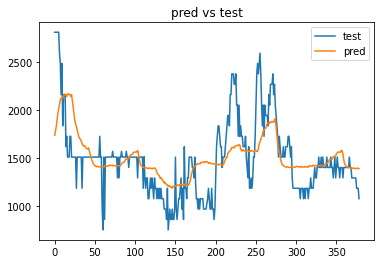

In [5]:
pred_y = pred_y.cpu().detach().numpy()
pred = np.concatenate([pred_y.reshape(-1, 1), test[:, 1:]], axis=1)

utils.plot_prediction(pred, test, ss)

# Terminal Score

In [4]:
utils.get_terminal_score()

だいこん: 
early stop at: 0.46141356229782104
にんじん: 
early stop at: 0.46767544746398926
キャベツ: 
early stop at: 0.28384602069854736
レタス: 
early stop at: 1.4091876745224
はくさい: 
early stop at: 0.7829951643943787
こまつな: 
early stop at: 0.31769484281539917
ほうれんそう: 
early stop at: 0.595862865447998
ねぎ: 
early stop at: 1.8249822854995728
きゅうり: 
early stop at: 0.3988262712955475
トマト: 
early stop at: 0.488251268863678
ピーマン: 
early stop at: 0.3524228036403656
じゃがいも: 
early stop at: 1.0721378326416016
なましいたけ: 
early stop at: 0.18045508861541748
セルリー: 
early stop at: 0.4625663161277771
そらまめ: 
early stop at: 1.8495677709579468
ミニトマト: 
early stop at: 0.48854872584342957
MSE: 0.7147771213203669(0.51843332295381)
